<h1>Home work 1</h1> 

<br>
<h2>Classification algorithms comparison</h2>

In [ ]:
import numpy as np
import torch
import pandas as pd 
from torch.autograd import Variable
from torch.nn import functional as F

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


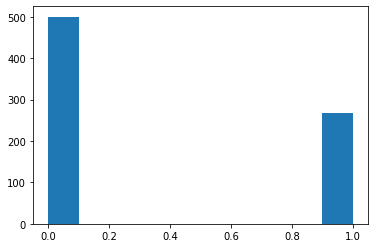

In [ ]:
import matplotlib.pyplot as plt

#classes = 

plt.hist(df['Outcome'])
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.array(df.drop(columns = ['Outcome']))
y = np.array(df['Outcome'])
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LogisticRegression, self).__init__()
        self.linear = (torch.nn.Linear(inputSize, outputSize))
        

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out
criterion = torch.nn.CrossEntropyLoss()
inputDim = x_train.shape[1]
outputDim = 2      
learningRate = 0.01
epochs = 500000


In [ ]:
model = LogisticRegression(inputDim,outputDim)
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train)

In [ ]:
Error = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    Error.append(loss)
    if (epoch%5000 == 0):
        print(epoch, ' ',loss)

0   tensor(0.9315, grad_fn=<NllLossBackward>)
5000   tensor(0.6074, grad_fn=<NllLossBackward>)
10000   tensor(0.6064, grad_fn=<NllLossBackward>)
15000   tensor(0.6058, grad_fn=<NllLossBackward>)
20000   tensor(0.6053, grad_fn=<NllLossBackward>)
25000   tensor(0.6050, grad_fn=<NllLossBackward>)
30000   tensor(0.6047, grad_fn=<NllLossBackward>)
35000   tensor(0.6044, grad_fn=<NllLossBackward>)
40000   tensor(0.6042, grad_fn=<NllLossBackward>)
45000   tensor(0.6040, grad_fn=<NllLossBackward>)
50000   tensor(0.6038, grad_fn=<NllLossBackward>)
55000   tensor(0.6013, grad_fn=<NllLossBackward>)
60000   tensor(0.6011, grad_fn=<NllLossBackward>)
65000   tensor(0.6010, grad_fn=<NllLossBackward>)
70000   tensor(0.6008, grad_fn=<NllLossBackward>)
75000   tensor(0.6007, grad_fn=<NllLossBackward>)
80000   tensor(0.6006, grad_fn=<NllLossBackward>)
85000   tensor(0.6005, grad_fn=<NllLossBackward>)
90000   tensor(0.6004, grad_fn=<NllLossBackward>)
95000   tensor(0.6003, grad_fn=<NllLossBackward>)
10000

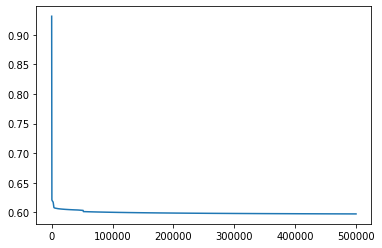

In [ ]:
%matplotlib inline
plt.plot(Error)

In [ ]:
x_test = torch.from_numpy(x_test).float()
y_pred = model.forward(x_test)

In [ ]:
y_pred = np.argmax(y_pred.detach().numpy(),axis = 1)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.58      0.57      0.57        46

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
confusion_matrix(y_test, y_pred)

array([[82, 26],
       [26, 20]], dtype=int64)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[89, 19],
       [20, 26]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.58      0.57      0.57        46

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.75      0.75      0.75       154



**TASK 1**

# **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=0)
treeFit = decision_tree.fit(x_train,y_train)
y_pred_tree = decision_tree.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       108
           1       0.50      0.57      0.53        46

    accuracy                           0.70       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.71      0.70      0.71       154



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix)


[[82 26]
 [20 26]]


In [ ]:
print("Decision Tree accuracy: ",decision_tree.score(x_test,y_test))


Decision Tree accuracy:  0.7012987012987013


In [ ]:
dtreescore = decision_tree.score(x_test,y_test)

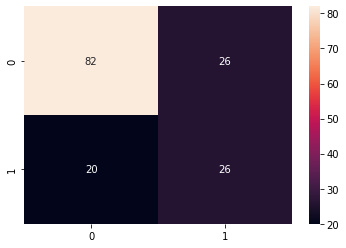

In [ ]:
label = ["0","1"]
sns.heatmap(confusion_matrix, annot=True, xticklabels=label, yticklabels=label)

In [ ]:
importance = decision_tree.feature_importances_
indices = np.argsort(importance)[::-1]
print("DecisionTree Feature ranking:")

feature_names = df.columns[0:8]
for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importance[indices[f]]))

DecisionTree Feature ranking:
1. Glucose (0.507249)
2. BMI (0.229654)
3. Age (0.156548)
4. DiabetesPedigreeFunction (0.049308)
5. Pregnancies (0.046845)
6. BloodPressure (0.010396)
7. Insulin (0.000000)
8. SkinThickness (0.000000)


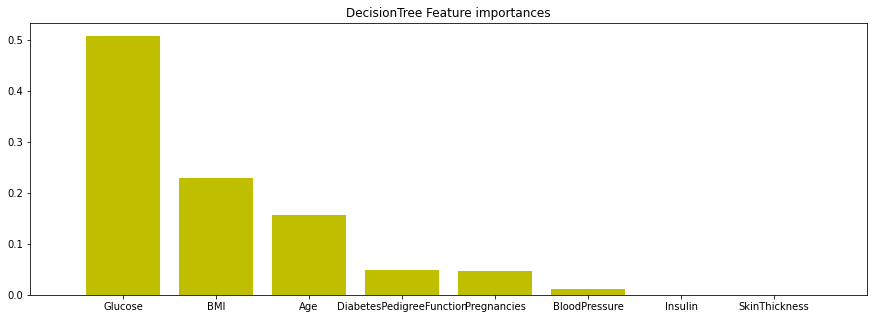

In [ ]:
plt.figure(figsize=(15,5))
plt.title("DecisionTree Feature importances")
plt.bar(range(feature.shape[1]), importance[indices], color="y", align="center")
plt.xticks(range(feature.shape[1]), feature_names[indices])
plt.xlim([-1, feature.shape[1]])
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       108
           1       0.64      0.54      0.59        46

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.76      0.77      0.77       154



In [ ]:
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
print(knn_confusion_matrix)

[[94 14]
 [21 25]]


In [ ]:
print("KNN accuracy: ",knn.score(x_test,y_test))
knnscore=knn.score(x_test,y_test)

KNN accuracy:  0.7727272727272727


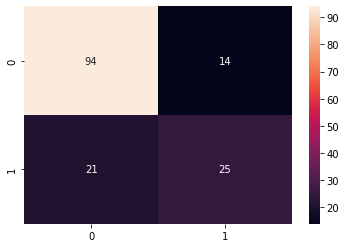

In [ ]:
label = ["0","1"]
sns.heatmap(knn_confusion_matrix, annot=True, xticklabels=label, yticklabels=label)

# **XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier(random_state=1)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       108
           1       0.53      0.59      0.56        46

    accuracy                           0.72       154
   macro avg       0.67      0.68      0.68       154
weighted avg       0.73      0.72      0.72       154



In [ ]:
xgb_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
print(xgb_confusion_matrix)

[[84 24]
 [19 27]]


In [ ]:
print("XGB accuracy: ",xgb.score(x_test,y_test))

XGB accuracy:  0.7207792207792207


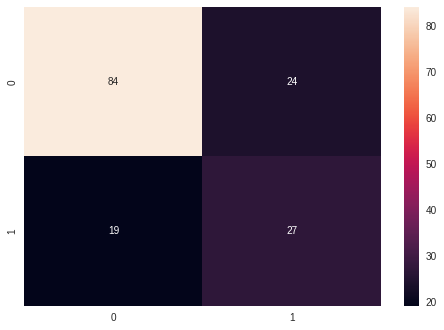

In [ ]:
label = ["0","1"]
sns.heatmap(xgb_confusion_matrix, annot=True, xticklabels=label, yticklabels=label)

# **EVALUATION OF ALGORITHMS**

In [ ]:
from sklearn.metrics import roc_curve, auc
import random

# Decision Tree

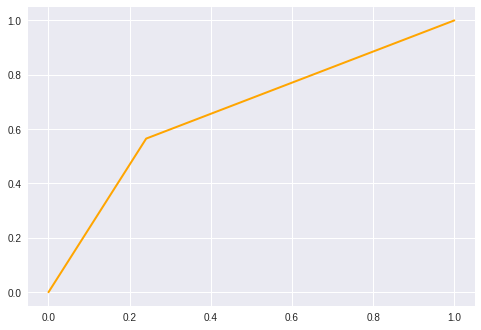

In [ ]:
fpr,tpr,thres = roc_curve(y_test, y_pred_tree)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='orange', lw=2, label='DecisionTree ROC curve (area = %0.2f)' % roc_auc)

# KNN

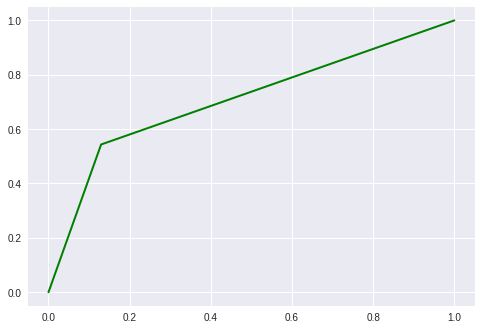

In [ ]:
k_fpr,k_tpr,k_thres = roc_curve(y_test, y_pred_knn)
roc_auc = auc(k_fpr, k_tpr)
plt.plot(k_fpr, k_tpr, color='green', lw=2, label='KNeighborsClassifier ROC curve (area = %0.2f)' % roc_auc)

# XGBoost

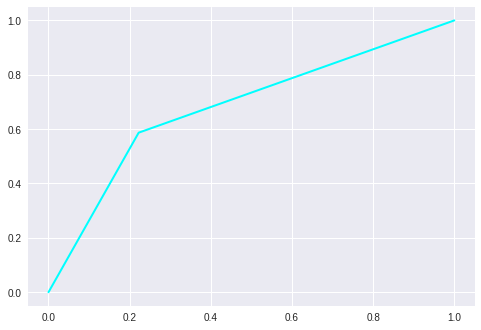

In [ ]:
x_fpr,x_tpr,x_thres = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(x_fpr, x_tpr)
plt.plot(x_fpr, x_tpr, color='cyan', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc)

# Logistic Regression

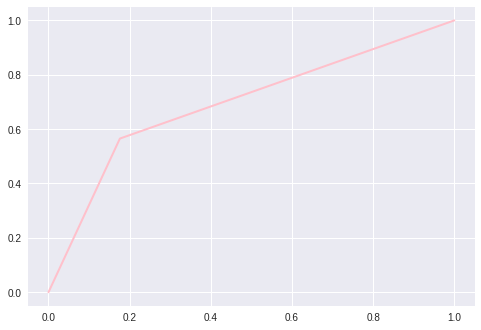

In [ ]:
l_fpr,l_tpr,l_thres = roc_curve(y_test, y_pred)
roc_auc = auc(l_fpr, l_tpr)
plt.plot(l_fpr, l_tpr, color='pink', lw=2, label='Logistiic Regression ROC curve (area = %0.2f)' % roc_auc)

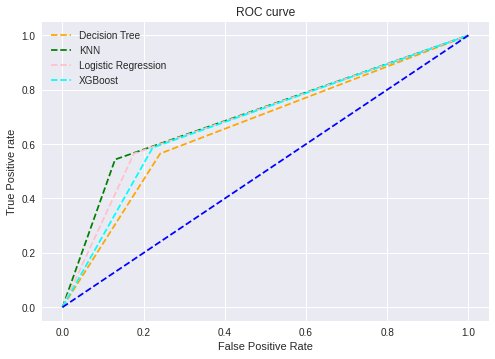

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Decision Tree')
plt.plot(k_fpr, k_tpr, linestyle='--',color='green', label='KNN')
plt.plot(l_fpr, l_tpr, linestyle='--',color='pink', label='Logistic Regression')
plt.plot(x_fpr, x_tpr, linestyle='--',color='cyan', label='XGBoost')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

It is evident from the plot that the AUC for the **KNN** ROC curve is higher than that for the **Decision Tree, Logistic Regression, XGBoost** ROC curve.  Therefore, we can say that **KNN** did a better job of classifying the positive class in the dataset. Plus **KNN**'s accuracy was the highest - 77.2%











..........................................................................................................................................................................................................................................

<h2>Task1</h2>
<br>
<li> Make a comparison for logistic regression and other 3 different classification/clasterisation algorithms for multiclass classification task and find one with overall accuracy more than 90% You can use all available sources 
<li> Make a comparative analisys for the observed algorithms and highlight why from your potint of view it shows the best result 
<li> Use the provided dataset for training and testing 
<li> Use classification report and confusion matrix for evaluation results 
    <h2>Task 2 </h2>
<br>
    <li> adopte logistic regressionfor for multiclassifiction on wine quality dataset 

# **TASK 2**

In [ ]:
import torch
import torchvision
import matplotlib
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
df = pd.read_csv('winequality-red.csv', sep = ';')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.shape


(1599, 12)

In [ ]:
input_cols=list(df.columns)[:-1]
output_cols = ['quality']
input_cols,output_cols

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 ['quality'])

In [ ]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = df.copy(deep=True)

    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [ ]:
inputs_array, targets_array = dataframe_to_arrays(df)
inputs_array, targets_array

(array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
        [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
        [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
        ...,
        [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
        [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
        [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]]), array([[5],
        [5],
        [5],
        ...,
        [6],
        [5],
        [6]]))

In [ ]:
inputs = torch.from_numpy(inputs_array).type(torch.float)
targets = torch.from_numpy(targets_array).type(torch.float)
inputs,targets

(tensor([[ 7.4000,  0.7000,  0.0000,  ...,  3.5100,  0.5600,  9.4000],
         [ 7.8000,  0.8800,  0.0000,  ...,  3.2000,  0.6800,  9.8000],
         [ 7.8000,  0.7600,  0.0400,  ...,  3.2600,  0.6500,  9.8000],
         ...,
         [ 6.3000,  0.5100,  0.1300,  ...,  3.4200,  0.7500, 11.0000],
         [ 5.9000,  0.6450,  0.1200,  ...,  3.5700,  0.7100, 10.2000],
         [ 6.0000,  0.3100,  0.4700,  ...,  3.3900,  0.6600, 11.0000]]),
 tensor([[5.],
         [5.],
         [5.],
         ...,
         [6.],
         [5.],
         [6.]]))

In [ ]:
print('Shape of input tensor and target tensor::  ',inputs.shape, targets.shape)
print('datatype of input tensor and target tensor::  ',inputs.dtype, targets.dtype)

Shape of input tensor and target tensor::   torch.Size([1599, 11]) torch.Size([1599, 1])
datatype of input tensor and target tensor::   torch.float32 torch.float32


In [ ]:
dataset = TensorDataset(inputs, targets)
dataset

In [ ]:
train_ds, val_ds = random_split(dataset, [1300, 299])
batch_size=50
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[7.5000e+00, 5.8000e-01, 3.0000e-02, 4.1000e+00, 8.0000e-02, 2.7000e+01,
         4.6000e+01, 9.9592e-01, 3.0200e+00, 4.7000e-01, 9.2000e+00],
        [7.7000e+00, 4.9000e-01, 2.6000e-01, 1.9000e+00, 6.2000e-02, 9.0000e+00,
         3.1000e+01, 9.9660e-01, 3.3900e+00, 6.4000e-01, 9.6000e+00],
        [9.1000e+00, 2.1000e-01, 3.7000e-01, 1.6000e+00, 6.7000e-02, 6.0000e+00,
         1.0000e+01, 9.9552e-01, 3.2300e+00, 5.8000e-01, 1.1100e+01],
        [7.4000e+00, 5.3000e-01, 1.2000e-01, 1.9000e+00, 1.6500e-01, 4.0000e+00,
         1.2000e+01, 9.9702e-01, 3.2600e+00, 8.6000e-01, 9.2000e+00],
        [6.7000e+00, 7.5000e-01, 1.0000e-02, 2.4000e+00, 7.8000e-02, 1.7000e+01,
         3.2000e+01, 9.9550e-01, 3.5500e+00, 6.1000e-01, 1.2800e+01],
        [6.6000e+00, 7.3500e-01, 2.0000e-02, 7.9000e+00, 1.2200e-01, 6.8000e+01,
         1.2400e+02, 9.9940e-01, 3.4700e+00, 5.3000e-01, 9.9000e+00],
        [7.0000e+00, 6.5000e-01, 2.0000e-02, 2.1000e+00, 6.6000e-02, 8.0000e+00,
     

In [ ]:
 print(xb.dtype,yb.dtype)

torch.float32 torch.float32


In [ ]:
input_size = len(input_cols)
output_size = len(output_cols)
input_size,output_size

(11, 1)

In [ ]:
class WineQuality(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size) 
        
    def forward(self, xb): 
        out = self.linear(xb) 
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)          
        loss = F.l1_loss(out,targets) 
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out,targets)    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        if (epoch+1) % 100 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [ ]:
model=WineQuality()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1428, -0.1253,  0.0285,  0.2116,  0.2762, -0.2254,  0.1328, -0.0207,
          -0.1450, -0.2100, -0.0777]], requires_grad=True),
 Parameter containing:
 tensor([-0.1047], requires_grad=True)]

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [ ]:
result = evaluate(model, val_loader)
print(result)

{'val_loss': 4.149383068084717}


In [ ]:
epochs = 1000
lr = 1e-2 
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 12.8581
Epoch [200], val_loss: 4.4314
Epoch [300], val_loss: 1.9573
Epoch [400], val_loss: 7.6306
Epoch [500], val_loss: 13.4490
Epoch [600], val_loss: 23.7397
Epoch [700], val_loss: 13.2290
Epoch [800], val_loss: 8.3428
Epoch [900], val_loss: 18.5405
Epoch [1000], val_loss: 7.8008


In [ ]:
epochs = 1000
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 1.6140
Epoch [200], val_loss: 1.1191
Epoch [300], val_loss: 1.1380
Epoch [400], val_loss: 1.2741
Epoch [500], val_loss: 1.4597
Epoch [600], val_loss: 1.2120
Epoch [700], val_loss: 0.8605
Epoch [800], val_loss: 1.1960
Epoch [900], val_loss: 1.1343
Epoch [1000], val_loss: 0.5920


In [ ]:
epochs = 1000
lr = 1e-4
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 0.5090
Epoch [200], val_loss: 0.5089
Epoch [300], val_loss: 0.4999
Epoch [400], val_loss: 0.4987
Epoch [500], val_loss: 0.4945
Epoch [600], val_loss: 0.4931
Epoch [700], val_loss: 0.4926
Epoch [800], val_loss: 0.4919
Epoch [900], val_loss: 0.4955
Epoch [1000], val_loss: 0.5092


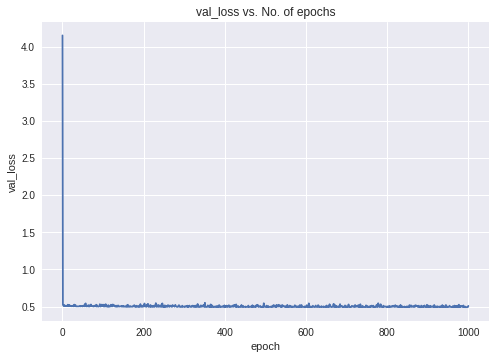

In [ ]:
plt.title('val_loss vs. No. of epochs');
loss_mat = [res['val_loss'] for res in [result] + history3]
plt.plot(loss_mat, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]

In [ ]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [ ]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([5.2000e+00, 3.4000e-01, 0.0000e+00, 1.8000e+00, 5.0000e-02, 2.7000e+01,
        6.3000e+01, 9.9160e-01, 3.6800e+00, 7.9000e-01, 1.4000e+01])
Target: tensor([6.])
Prediction: tensor([6.7705])


In [ ]:
input, target = val_ds[62]
predict_single(input, target, model)

Input: tensor([7.5000e+00, 3.8000e-01, 4.8000e-01, 2.6000e+00, 7.3000e-02, 2.2000e+01,
        8.4000e+01, 9.9720e-01, 3.3200e+00, 7.0000e-01, 9.6000e+00])
Target: tensor([4.])
Prediction: tensor([5.1901])
